In [19]:
import numpy as np
import matplotlib.pyplot as plt

# if scienceplots is available, use it
try:
    import scienceplots
    plt.style.use('science')
except ImportError:
    print('scienceplots not available, using default style')
    pass


In [20]:
def movingAverage(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

In [21]:
path = "logs/"
path += "240513_131818_MediumGrid"

gameLength = np.load(f"{path}/game_length_tracker.npy")
rewards = np.load(f"{path}/reward_tracker.npy")

window_size = 100
gameLengthMA = movingAverage(gameLength, window_size)
rewardsMA = movingAverage(rewards, window_size)


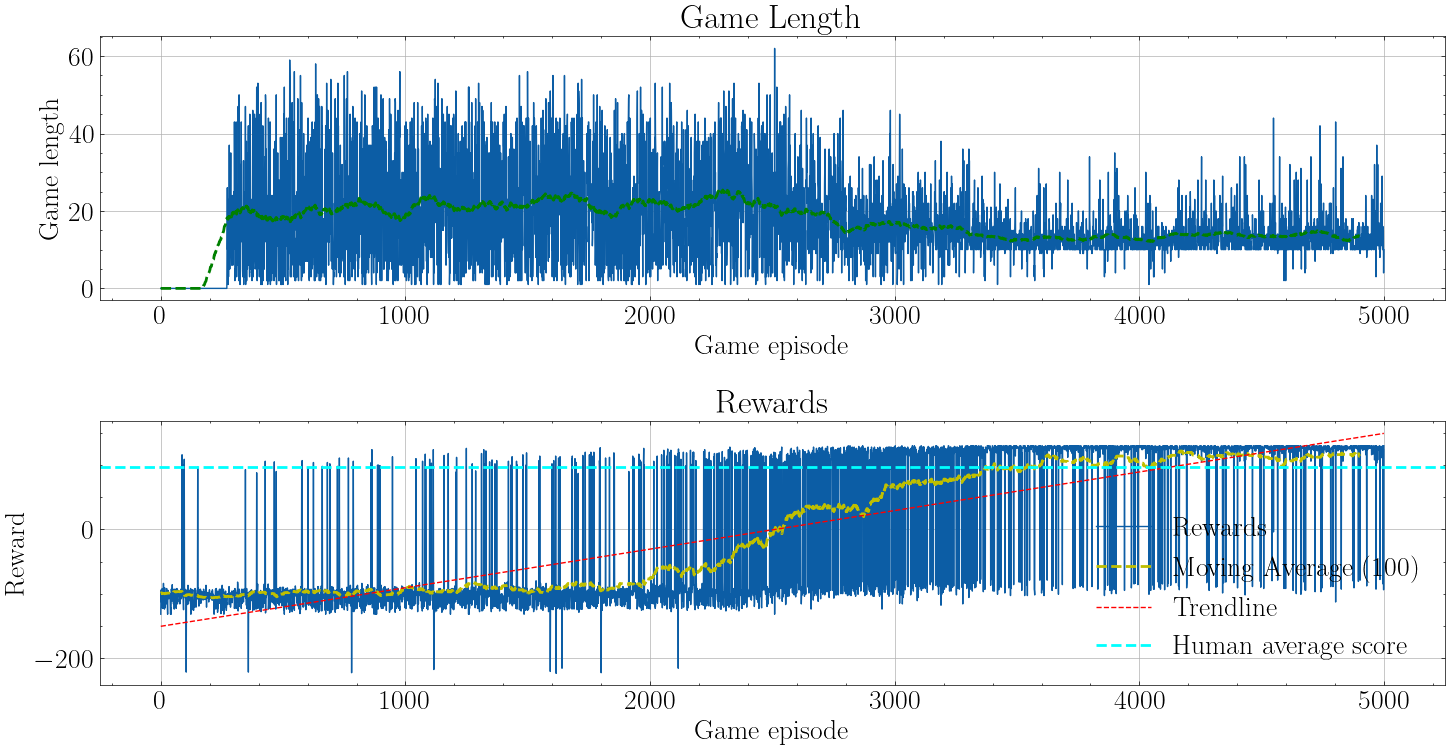

In [22]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(gameLength)
plt.plot(gameLengthMA, 'g--', label=f'Moving Average ({window_size})', linewidth = 2)
plt.title('Game Length')
plt.xlabel('Game episode')
plt.ylabel('Game length')
plt.grid()

plt.subplot(212)
plt.plot(rewards, label = 'Rewards')
plt.plot(rewardsMA, 'y--', label=f'Moving Average ({window_size})', linewidth = 2)
plt.title('Rewards')
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()

# trendline
z = np.polyfit(np.arange(len(rewards)), rewards, 1)
p = np.poly1d(z)
plt.plot(p(np.arange(len(rewards))), 'r--', label='Trendline')


## add horizontal line at y=97

plt.axhline(y=97, color="cyan", linestyle='--', linewidth = 2, label="Human average score")

plt.legend()


plt.tight_layout()

# save the plot
# plt.savefig(f"{path}/plot.eps", format="eps")

plt.show()

Mask to only show episodes with reward > 50


In [23]:
# mask the arrays to only contain the element with a reward higher than 50
mask = rewards > 50
gameLengthMasked = gameLength[mask]
rewardsMasked = rewards[mask]

window_size = 100
gameLengthMA = movingAverage(gameLengthMasked, window_size)
rewardsMA = movingAverage(rewardsMasked, window_size)

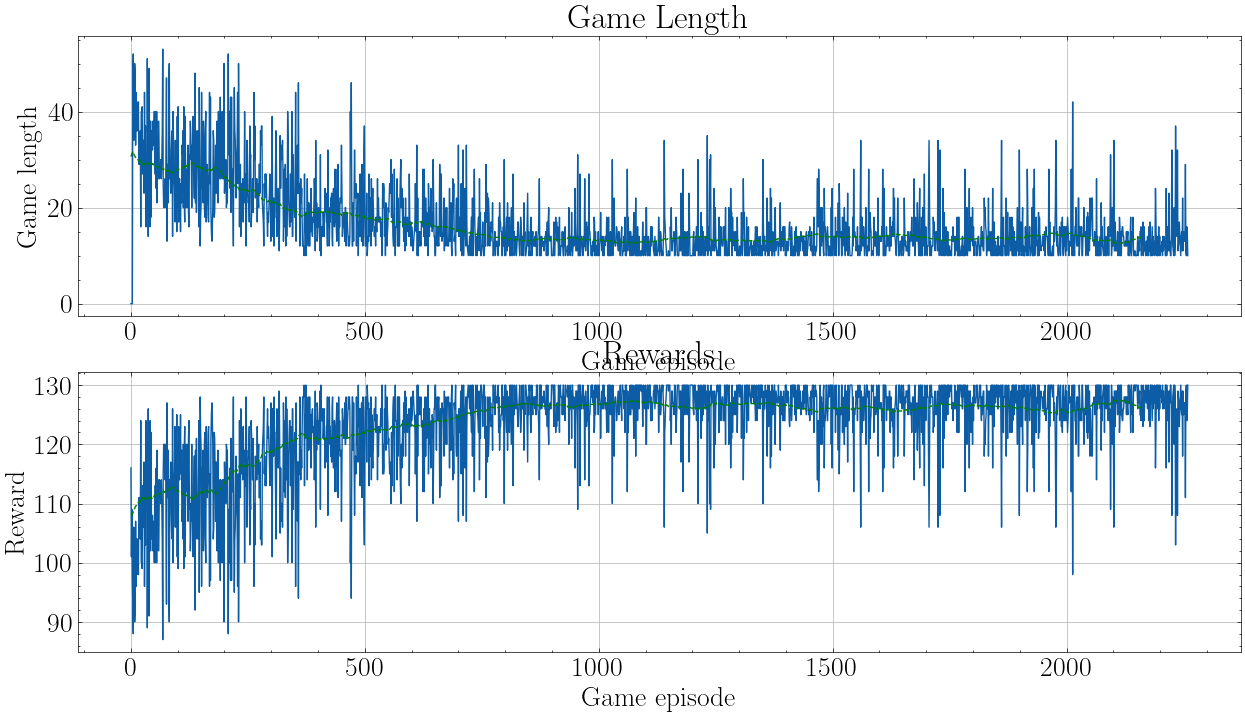

In [24]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(gameLengthMasked)
plt.plot(gameLengthMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Game Length')
plt.xlabel('Game episode')
plt.ylabel('Game length')
plt.grid()

plt.subplot(212)
plt.plot(rewardsMasked, label = 'Rewards')
plt.plot(rewardsMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Rewards')
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()



Poster Plots


In [25]:
gameLength = np.load(f"{path}/game_length_tracker.npy")
rewards = np.load(f"{path}/reward_tracker.npy")

window_size = 100
gameLengthMA = movingAverage(gameLength, window_size)
rewardsMA = movingAverage(rewards, window_size)

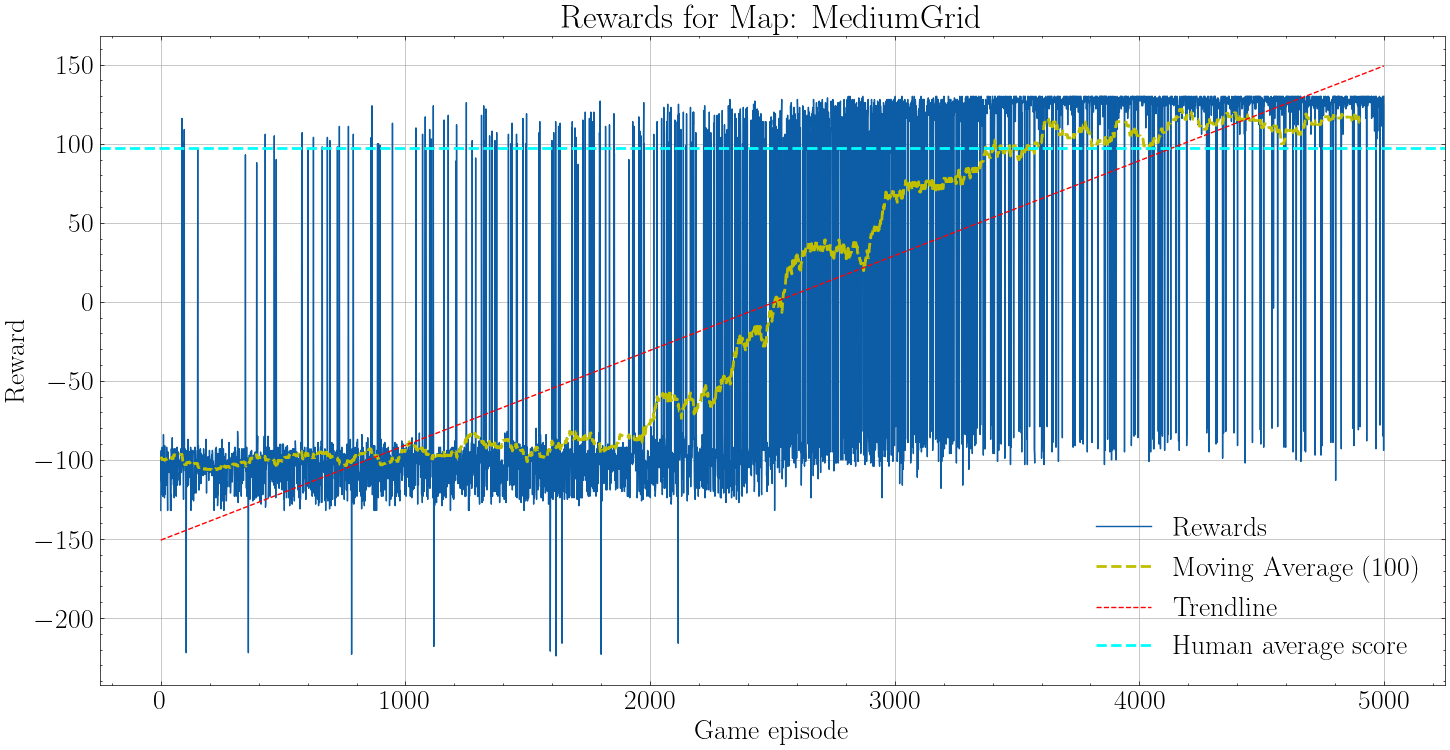

In [26]:
# Plot for Poster
mapName = "MediumGrid"
plt.rcParams['font.size'] = 20
plt.figure(figsize=(15, 8))
plt.plot(rewards, label = 'Rewards')
plt.plot(rewardsMA, 'y--', label=f'Moving Average ({window_size})', linewidth = 2)
plt.title('Rewards for Map: ' + mapName)
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()

# trendline
z = np.polyfit(np.arange(len(rewards)), rewards, 1)
p = np.poly1d(z)
plt.plot(p(np.arange(len(rewards))), 'r--', label='Trendline')


## add horizontal line at y=97

plt.axhline(y=97, color="cyan", linestyle='--', linewidth = 2, label="Human average score")

plt.legend()

plt.tight_layout()

# save the plot
plt.savefig(f"{path}/PosterPlot_"+ mapName +".eps", format="eps")

plt.show()